In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D , GlobalMaxPooling2D, ZeroPadding2D,Convolution2D,BatchNormalization,Flatten,SeparableConv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop, SGD
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras

from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import glob



In [116]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [117]:
#資料增強
train_img_gen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             fill_mode = 'nearest',
                             rescale=1./255,
                             dtype=np.float32
                            )

test_img_gen = ImageDataGenerator(      
                             rescale=1./255,
                             dtype=np.float32
                            )


ImageDataGenerator中常見的Augmentation(輸入形式、內容)：
featurewise_center：輸入為Boolean(True or False)，以每一張feature map為單位將平均值設為0
featurewise_std_normalization: 輸入為Boolean(True or False) ，以每一張feature map為單位將數值除以其標準差(上述兩步驟就是我們常見的Standardization)
zca_whitening: Boolean，透過ZCA取出重要特徵(詳見：ZCA介紹)
rotation_range：整數值，控制隨機旋轉角度
width_shift_range：「浮點、整數、一維數」，圖像寬度上隨機偏移值
height_shift_range：「浮點、整數、一維數」，圖像高度上隨機偏移值
shear_range：浮點數，裁切範圍
zoom_range：浮點數或範圍，隨機縮放比例
horizontal_flip: Boolean，隨機水平翻轉
vertical_flip:Boolean，隨機垂直翻轉
rescale: 數值，縮放比例
dtype：輸出資料型態


In [118]:
image_size = (224,224)
batch_size = 16
epochs = 10

In [119]:
train_generator = train_img_gen.flow_from_directory(
        "D:archive/dataset/training_set/",
        target_size=image_size,       # resize images to (224,224) to increase the training speed and efficiency
        batch_size=batch_size,
#         class_mode = 'binary'
        )

Found 20000 images belonging to 2 classes.


In [120]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [121]:
for train_data , train_label in train_generator:
    print('train_date shape:', train_data.shape)
    print('train_label shape:', train_label.shape)
    break

train_date shape: (16, 224, 224, 3)
train_label shape: (16, 2)


C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [122]:
test_generator = test_img_gen.flow_from_directory(
    "D:archive/dataset/validation_set/",
     target_size=image_size,
     batch_size=batch_size,
#     class_mode = 'binary'
    )

Found 5000 images belonging to 2 classes.


In [123]:
print(test_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [124]:
for test_data , test_label in train_generator:
    print('test_date shape:', test_data.shape)
    print('test_label shape:', test_label.shape)
    break

test_date shape: (16, 224, 224, 3)
test_label shape: (16, 2)


In [125]:
# from keras import models
# from keras import layers
# from keras.applications.vgg16 import VGG16
# conv_base = VGG16(weights = 'imagenet',
#                  include_top = False,
#                  input_shape = (224,224,3))
# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(256,activation='relu'))
# model.add(layers.Dense(2,activation='softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001),metrics=["accuracy"])
# model.summary()

In [134]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (5,5),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128,kernel_size = (1,1),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256,kernel_size = (1,1),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 512,kernel_size = (1,1),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 224, 224, 32)      2432      
_________________________________________________________________
batch_normalization_32 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 224, 224, 32)      25632     
_________________________________________________________________
batch_normalization_33 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 224, 224, 32)      25632     
_________________________________________________________________
batch_normalization_34 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 32)     

In [135]:
output_dir=r'D:archive/dataset/log/'
checkpoint_filepath=r'D:archive/dataset/log/model.weight.best.hdf5'


basic_learning_rate = 0.001
opt = Adam(lr=basic_learning_rate, decay=basic_learning_rate/10.)
# callbacks = [
#             tf.keras.callbacks.ModelCheckpoint(
#             filepath=checkpoint_filepath, #filepath: 字符串，保存模型的路徑
#             save_weights_only=False, #save_weights_only: 如果 True，那麼只有模型的權重會被保存 (model.save_weights(filepath))， 否則的话，整個模型會被保存 (model.save(filepath))。
#             monitor='val_loss', #monitor: 監測的數據
#             mode='min', #mode: {auto, min, max} 其中之一。 在 min 模式中， 當監測的數據停止下降，訓練就會停止；在 max 模式中，當監測的數據停止上升，訓練就會停止；在 auto 模式中，方向會自動從被監測的數據的名字中判對出來。
#             save_best_only=True) #save_best_only: 如果 True， 被監測數據的最佳模型就不會被覆蓋。
#             ]

model.compile(loss='categorical_crossentropy', 
              optimizer = opt,
              metrics=["accuracy"],)
#categorical_crossentropy

history = model.fit(train_generator,
                   steps_per_epoch = (20000//batch_size),
                    epochs = epochs,
                    validation_data = test_generator,
                    validation_steps = (5000//batch_size),
#                     callbacks=callbacks
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1250 steps, validate for 312 steps
Epoch 1/10


C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1250/1250 [==============================] - 403s 322ms/step - loss: 0.7039 - accuracy: 0.5936 - val_loss: 0.6371 - val_accuracy: 0.6398
Epoch 2/10
1250/1250 [==============================] - 402s 321ms/step - loss: 0.6168 - accuracy: 0.6602 - val_loss: 0.6920 - val_accuracy: 0.6232
Epoch 3/10
1250/1250 [==============================] - 402s 321ms/step - loss: 0.5762 - accuracy: 0.7017 - val_loss: 0.5808 - val_accuracy: 0.6997
Epoch 4/10
1250/1250 [==============================] - 402s 321ms/step - loss: 0.5395 - accuracy: 0.7264 - val_loss: 0.4801 - val_accuracy: 0.7792
Epoch 5/10
1250/1250 [==============================] - 402s 322ms/step - loss: 0.4905 - accuracy: 0.7618 - val_loss: 0.4148 - val_accuracy: 0.8077
Epoch 6/10
1250/1250 [==============================] - 402s 322ms/step - loss: 0.4453 - accuracy: 0.7952 - val_loss: 0.3852 - val_accuracy: 0.8275
Epoch 7/10
1250/1250 [==============================] - 402s 322ms/step - loss: 0.3933 - accuracy: 0.8229 - val_loss: 0.349

In [136]:
model.save('animal_classify.h5')


In [137]:
TrainERR=history.history['loss']
ValidERR=history.history['val_loss']
TrainACC = history.history['accuracy']
ValidACC = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

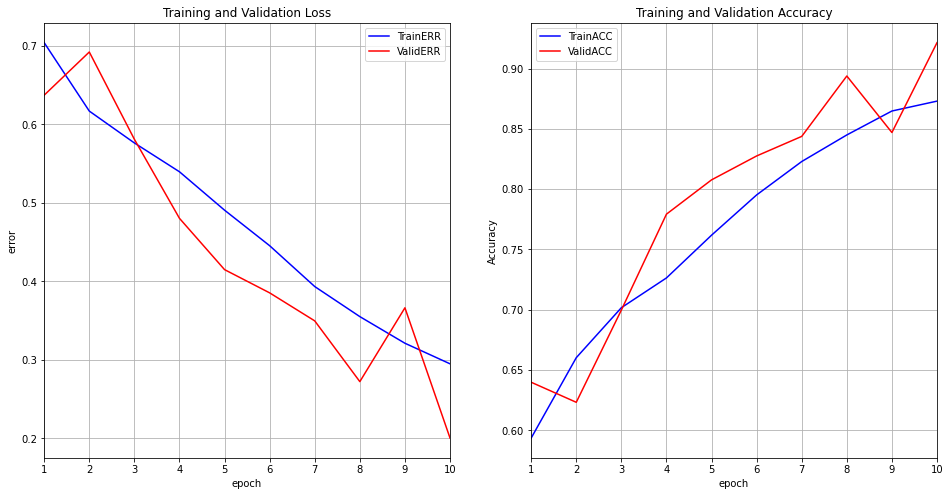

In [138]:
plt.clf()

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),TrainERR,'b',label='TrainERR')
plt.plot(range(1,epochs+1),ValidERR,'r',label='ValidERR')
plt.xlim([1,epochs])
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),TrainACC,'b',label='TrainACC')
plt.plot(range(1,epochs+1),ValidACC,'r',label='ValidACC')
plt.xlim([1,epochs])
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)


plt.savefig('Learning_curve_animal_classify.jpg')
plt.show()

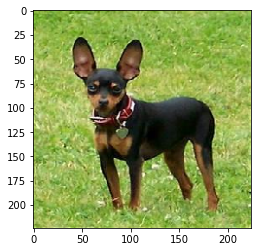

In [141]:
from keras.preprocessing import image

img = image.load_img('D:animal/raw_img/raw/dog/OIP-3IXqU1emuF_nmVh7JjBruwHaIp.jpeg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img);

{'cat': 0.0004961009}
{'dog': 0.99950385}
有 1.0 這是一隻dog！


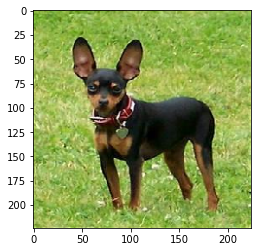

In [142]:
proba = model.predict(img.reshape(1,224,224,3))
# animal_list = ['butterfly', 'cat', 'chicken', 'cow', 'dog','elephant', 'horse', 'sheep', 'spider', 'squirrel']
animal_list = ['cat','dog']
for i in range(len(animal_list)):
    x = {str(animal_list[i]):proba[0][i]} 
    print(x)
max_prob = round(proba[0].max(), 2) 
max_animal = animal_list[proba[0].argmax()]
print(f'有 {max_prob} 這是一隻{max_animal}！')
plt.imshow(img);

In [ ]:

model =  keras.models.load_model('./animal_classify.h5')
# model.summary()
